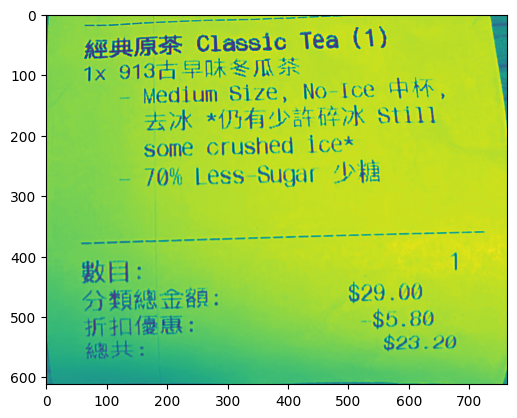

In [40]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image = '/Users/mic/Desktop/Tecky/BAD/BAD-Project/testFiles/testPhotos/cropped08.png'

img=cv2.imread(image, cv2.IMREAD_GRAYSCALE)
height=img.shape[0]
width=img.shape[1]

plt.imshow(img)

def contrastPicture(img, width, height):
    rect = np.array([[0,0],[width,0],[width,height],[0,height]],dtype="float32")
    dst = np.array([
        [0, 0],
        [width - 1, 0],
        [width - 1, height - 1],
        [0, height - 1]], dtype = "float32")
    # calculate the perspective transform matrix
    M = cv2.getPerspectiveTransform(rect, dst)
    # warp the perspective to grab the screen
    return cv2.warpPerspective(img, M, (width, height))

scanned = contrastPicture(img,width,height)


In [16]:
import cv2
from PIL import Image
def bwScanner():
    originalImage = cv2.imread('/Users/mic/Desktop/Tecky/BAD/BAD-Project/testFiles/testPhotos/cropped05.png')
    grayImage = cv2.cvtColor(originalImage, cv2.COLOR_BGR2GRAY)
    (thresh, blackAndWhiteImage) = cv2.threshold(grayImage, 155, 255, cv2.THRESH_BINARY)
    image=Image.fromarray(blackAndWhiteImage)
    image.save('bw01.jpg',quality=95,dpi=(300,300))
bwScanner()

In [17]:
import cv2 as cv
import numpy as np 
from PIL import Image

img = cv2.imread('/Users/mic/Desktop/Tecky/BAD/BAD-Project/testFiles/testPhotos/cropped05.png')
alpha = 1.5
beta = 0
adjusted = cv.convertScaleAbs(img,alpha=alpha,beta=beta)



array([[[ 81, 160, 225],
        [ 81, 159, 224],
        [ 93, 171, 231],
        ...,
        [ 33,  92, 142],
        [ 27,  84, 135],
        [ 22,  81, 129]],

       [[ 99, 178, 243],
        [ 92, 170, 234],
        [ 81, 159, 219],
        ...,
        [ 26,  86, 135],
        [ 28,  87, 138],
        [ 30,  88, 138]],

       [[116, 195, 255],
        [122, 200, 255],
        [110, 188, 248],
        ...,
        [ 22,  82, 134],
        [ 26,  84, 135],
        [ 27,  87, 136]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [18]:
import cv2
import skimage
from .._shared.filters import gaussian
from .._shared.utils import _supported_float_type, warn
from scipy import ndimage as ndi

image = '/Users/mic/Desktop/Tecky/BAD/BAD-Project/testFiles/testPhotos/cropped08.png'

def threshold_local(image, block_size=3, method='gaussian', offset=0,
                    mode='reflect', param=None, cval=0):
    if np.isscalar(block_size):
        block_size = (block_size,) * image.ndim
    elif len(block_size) != image.ndim:
        raise ValueError("len(block_size) must equal image.ndim.")
    block_size = tuple(block_size)
    if any(b % 2 == 0 for b in block_size):
        raise ValueError(f'block_size must be odd! Given block_size '
                         f'{block_size} contains even values.')
    float_dtype = _supported_float_type(image)
    image = image.astype(float_dtype, copy=False)
    thresh_image = np.zeros(image.shape, dtype=float_dtype)
    if method == 'generic':
        ndi.generic_filter(image, param, block_size,
                           output=thresh_image, mode=mode, cval=cval)
    elif method == 'gaussian':
        if param is None:
            # automatically determine sigma which covers > 99% of distribution
            sigma = tuple([(b - 1) / 6.0 for b in block_size])
        else:
            sigma = param
        gaussian(image, sigma, output=thresh_image, mode=mode, cval=cval)
    elif method == 'mean':
        ndi.uniform_filter(image, block_size, output=thresh_image, mode=mode,
                           cval=cval)
    elif method == 'median':
        ndi.median_filter(image, block_size, output=thresh_image, mode=mode,
                          cval=cval)
    else:
        raise ValueError("Invalid method specified. Please use `generic`, "
                         "`gaussian`, `mean`, or `median`.")

    return thresh_image - offset

    
def bw_scanner(image):
    image = '/Users/mic/Desktop/Tecky/BAD/BAD-Project/testFiles/testPhotos/cropped08.png'
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    T = threshold_local(gray, 21, offset = 5, method = "gaussian")
    return (gray > T).astype("uint8") * 255

ImportError: cannot import name '_supported_float_type' from 'skimage' (/Users/mic/Desktop/Tecky/BAD/BAD-Project/.pyenv/lib/python3.9/site-packages/skimage/__init__.py)